In [27]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [28]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


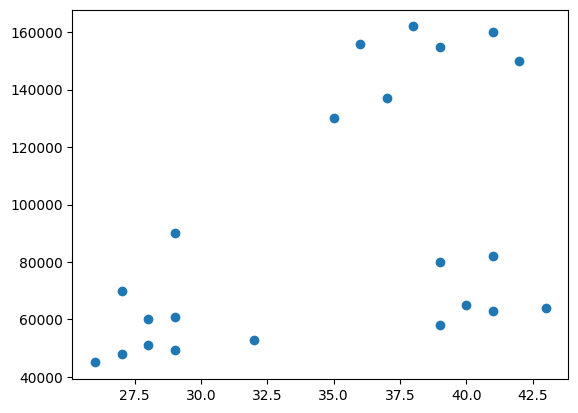

In [29]:
plt.scatter(df['Age'],df['Income($)'])

In [30]:
# Scalling problem control using minmaxscaler -> MinMaxScaler puts all the (x,y) values into 0-1 range
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [31]:
# Using Elbow method to find the exact k value for clustering

k_rng = range(1,11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

sse

C:\Users\sayem\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sayem\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sayem\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sayem\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.27558255687229766,
 0.2106667848801052,
 0.1812215383031342,
 0.1397684499538816,
 0.10188787724979426,
 0.08026197041664467]

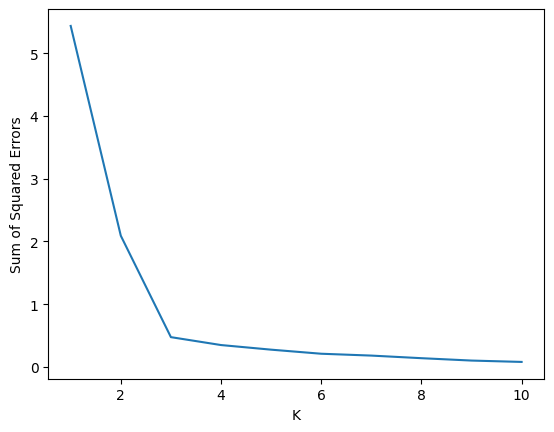

In [32]:
plt.xlabel('K')
plt.ylabel("Sum of Squared Errors")
plt.plot(k_rng,sse)  # k = 3 

In [33]:
# Creating KMeans object

km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [34]:
# Marking clusters

y__predicted = km.fit_predict(df[['Age',"Income($)"]])
y__predicted

C:\Users\sayem\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [35]:
df['Cluster'] = y__predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [ ]:
km.cluster_centers_

Text(0, 0.5, 'Income($)')

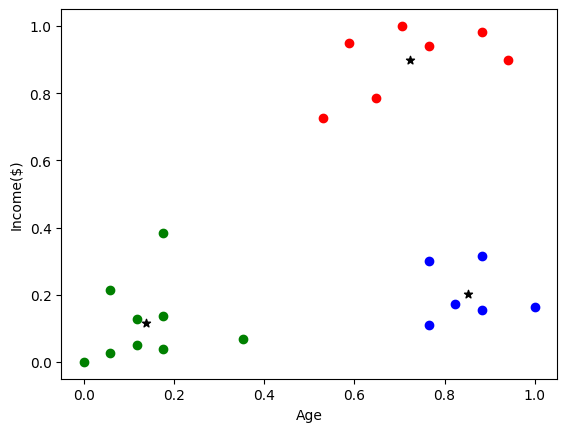

In [40]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='Green')
plt.scatter(df2.Age,df2['Income($)'],color='Red')
plt.scatter(df3.Age,df3['Income($)'],color='Blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black', marker='*',label='Centroids')
plt.xlabel("Age")
plt.ylabel("Income($)")

